Importamos todas las librerias necesarias.

In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings

In [2]:
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from scipy import stats
from scipy.stats import norm, skew 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #limita los float a tres decimales.

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# para el modelo
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

#Gridsearch
from sklearn.model_selection import GridSearchCV

In [3]:
#importando data
df = pd.read_csv(r'./house_train_raw.csv', encoding= 'utf8')

In [4]:
# revisamos el numero de registros y columnas y el contenido de cada una de estas
print(df.shape)
df.head()


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


la mayoria de las columnas son categoricas describen y clasifican caracteristicas de las casas de las columnas que son numericas
se destaca el precio de venta ya que si logramos predecir este dato los clientes o usuarios pueden tomar deciciones basadas en este data ya que es la que mas determina el tomar una decisión de comprar o no. 

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

ya que notamos que el precio de venta no tiene valores nulos entonces se realiza el anàlisis de la distribuciòn de los datos

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Se observa que tienen un sesgo hacia la derecha con picos. la idea seria transformar estos datos para que tengan una distribuciòn normal, la idea de  esto es prepararlos para un anàlisis de regresiòn lineal la cual asume que los datos tienen una forma normal y lineales.


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 1.0, 'SalePrice distribucion')

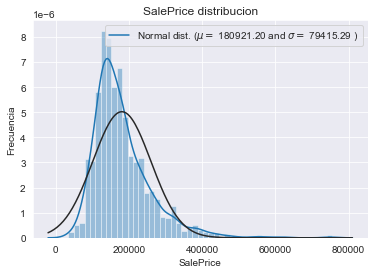

In [8]:
sns.distplot(df['SalePrice'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('SalePrice distribucion')


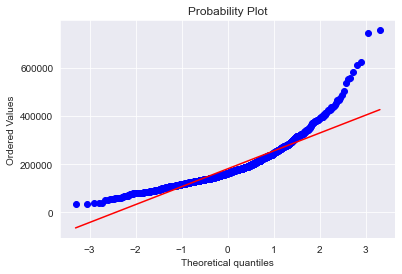

In [9]:
#analizamos tambièn el qq-plot que nos muestra las diferencias sustanciales de la linealidad de los datos.
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

Con las metricas de skewnessnos indica la simetria de la distribuion es este caso al ser mayor de cero tiene una sesgo hacia la derecha lo que significa que la media es jalada hacia la derecha por unos pocos valores altos, la mediana tiende a ser mas robusta y resistente. Kurtosis nos ayuda a detectar los valores extremos que provocan un pico en la distribuciòn de los datos.  como podemos observar en nuestros datos este valor es mayor 3 (6.5363) por lo que se dice que decimos que es una distribuciòn leptocùrtica es  decir que presenta un grado de concentracion mayor alrededor de los valores centrales 

In [10]:

print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Realizamos una trasformaciòn  logaritmica sobre los datos y volvemos a revisar la distribuciòn de los datos


 mu = 12.02 and sigma = 0.40



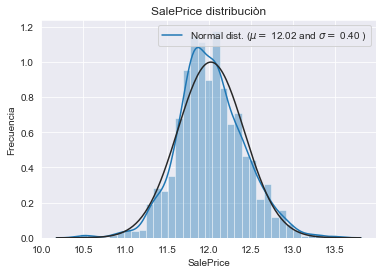

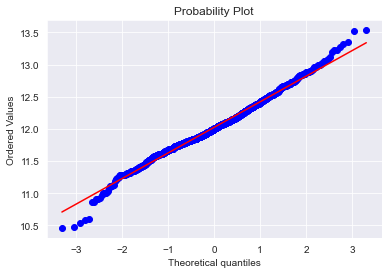

In [11]:
df["SalePrice"] = np.log1p(df["SalePrice"])

#Chequeamos la nueva distribuciòn
sns.distplot(df['SalePrice'] , fit=norm);

#normalizamos los datos
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#graficamos la distribucion
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('SalePrice distribuciòn')

#graficamos  los picos (QQ-plot)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

Al acercarse el valor de las metricas a cero nos indica que que los datos fueron transformados lo mas cercano posible a una distribuciòn normal por lo que ya estan listos para  aplicar cualquier otro anàlisis estadistico.

In [12]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 0.121347
Kurtosis: 0.809519


Limpieza de datos nulos

In [13]:
df_na = df.isnull().sum()
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
data_nulos= pd.DataFrame({'Valores Nulos' :df_na})
data_nulos

,Valores Nulos
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


Text(0.5, 1.0, 'Valores nulos por columna')

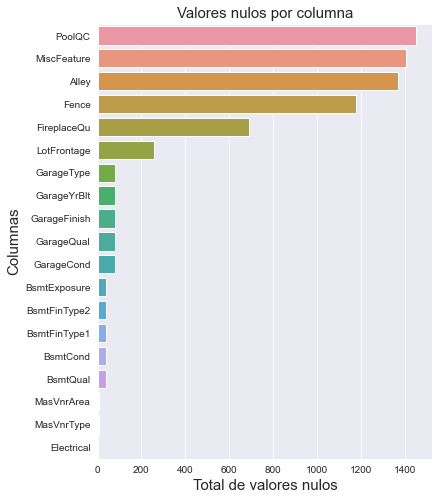

In [14]:
f, ax = plt.subplots(figsize=(6, 8))
sns.barplot(x=df_na, y=df_na.index)
plt.ylabel('Columnas', fontsize=15)
plt.xlabel('Total de valores nulos', fontsize=15)
plt.title('Valores nulos por columna', fontsize=15)

Limpieza de valores nulos

In [15]:
'''se sustituyen todos los valores nulos en las variables categoricas por las palabras "No tiene" y 
en el caso de las variables númericas por la mediana'''

df["PoolQC"] = df["PoolQC"].fillna("No tiene")
df["MiscFeature"] = df["MiscFeature"].fillna("No tiene")
df["Alley"] = df["Alley"].fillna("No tiene")
df["Fence"] = df["Fence"].fillna("No tiene")
df["FireplaceQu"] = df["FireplaceQu"].fillna("No tiene")
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('No tiene')
df['GarageType'] = df['GarageType'].fillna('No tiene')
df['GarageFinish'] = df['GarageFinish'].fillna('No tiene')
df['GarageQual'] = df['GarageQual'].fillna('No tiene')
df['GarageCond'] = df['GarageCond'].fillna('No tiene')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No tiene')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No tiene')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No tiene')
df['BsmtCond'] = df['BsmtCond'].fillna('No tiene')
df['BsmtQual'] = df['BsmtQual'].fillna('No tiene')
df["MasVnrType"] = df["MasVnrType"].fillna("No tiene")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [16]:
#Chequeamos no quedara ningun dato nulo
df_na = df.isnull().sum()
len(df_na[df_na != 0])

0

In [17]:
#Revisamos los tipos de columnas
df.dtypes.value_counts()

object     44
int64      34
float64     3
dtype: int64

In [18]:
#Creamos una lista de las columnas numericas, excluyendo el Id
columnas_numericas = list(df.dtypes[df.dtypes != 'object'].index.drop('Id'))

Creamos un dataframe de las columnas con los valores que corresponda a skew y kurt

In [19]:
skew = df[columnas_numericas].apply(lambda columna: columna.skew(), axis=0)
kurt = df[columnas_numericas].apply(lambda columna: columna.kurt(), axis=0)
skew_kurt = pd.concat([skew, kurt], axis=1)
skew_kurt.shape

(36, 2)

In [20]:
skew_kurt.sort_values([0], ascending=[False])

,0,1
MiscVal,24.477,701.003
PoolArea,14.828,223.268
LotArea,12.208,203.243
3SsnPorch,10.304,123.662
LowQualFinSF,9.011,83.235
KitchenAbvGr,4.488,21.532
BsmtFinSF2,4.255,20.113
ScreenPorch,4.122,18.439
BsmtHalfBath,4.103,16.397
EnclosedPorch,3.090,10.431


In [21]:

columnas_alto_skewed = skew_kurt.loc[abs(skew_kurt[0]) > 0.75].index
columnas_alto_skewed

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [22]:
#hacemos transformacion logaritmica a cada una de las columnas
for columna in columnas_alto_skewed:
    df[columna] = np.log1p(df[columna])

Vamos a considerar como variables categoricas a las que tengan menos o igual a 50 valores categoricos unicos

In [23]:
columnas_unicas = pd.Series()

In [24]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.111,RL,4.190,9.042,Pave,No tiene,Reg,Lvl,AllPub,...,0.000,No tiene,No tiene,No tiene,0.000,2,2008,WD,Normal,12.248
1,2,3.045,RL,4.394,9.170,Pave,No tiene,Reg,Lvl,AllPub,...,0.000,No tiene,No tiene,No tiene,0.000,5,2007,WD,Normal,12.109
2,3,4.111,RL,4.234,9.328,Pave,No tiene,IR1,Lvl,AllPub,...,0.000,No tiene,No tiene,No tiene,0.000,9,2008,WD,Normal,12.317
3,4,4.263,RL,4.111,9.164,Pave,No tiene,IR1,Lvl,AllPub,...,0.000,No tiene,No tiene,No tiene,0.000,2,2006,WD,Abnorml,11.849
4,5,4.111,RL,4.443,9.565,Pave,No tiene,IR1,Lvl,AllPub,...,0.000,No tiene,No tiene,No tiene,0.000,12,2008,WD,Normal,12.429


In [39]:
nom = {} 
nom['keys'] = {}

In [40]:
for col in df.columns:
        if col not in nom['keys']:
                nom['keys'][col] = {}
                nom['count'] = len(df)
for col in df.columns:
        numero= (len(df[col].groupby(df[col]).nunique()))  
        if numero <=50:
                nom['keys'][col]['unique'] = len(df[col].groupby(df[col]).nunique())
        
        

In [41]:
nom

{'keys': {'Id': {},
  'MSSubClass': {'unique': 15},
  'MSZoning': {'unique': 5},
  'LotFrontage': {},
  'LotArea': {},
  'Street': {'unique': 2},
  'Alley': {'unique': 3},
  'LotShape': {'unique': 4},
  'LandContour': {'unique': 4},
  'Utilities': {'unique': 2},
  'LotConfig': {'unique': 5},
  'LandSlope': {'unique': 3},
  'Neighborhood': {'unique': 25},
  'Condition1': {'unique': 9},
  'Condition2': {'unique': 8},
  'BldgType': {'unique': 5},
  'HouseStyle': {'unique': 8},
  'OverallQual': {'unique': 10},
  'OverallCond': {'unique': 9},
  'YearBuilt': {},
  'YearRemodAdd': {},
  'RoofStyle': {'unique': 6},
  'RoofMatl': {'unique': 8},
  'Exterior1st': {'unique': 15},
  'Exterior2nd': {'unique': 16},
  'MasVnrType': {'unique': 5},
  'MasVnrArea': {},
  'ExterQual': {'unique': 4},
  'ExterCond': {'unique': 5},
  'Foundation': {'unique': 6},
  'BsmtQual': {'unique': 5},
  'BsmtCond': {'unique': 5},
  'BsmtExposure': {'unique': 5},
  'BsmtFinType1': {'unique': 7},
  'BsmtFinSF1': {},
  'B

In [48]:
columnas_cate = pd.DataFrame (nom)


In [49]:
del(columnas_cate['count'])

In [50]:
columnas_cate = columnas_cate.drop(columnas_cate[columnas_cate['keys']=={}].index)

In [52]:
columnas_idex=columnas_cate.index

In [53]:
'''Convert categorical features to strings'''
for i in columnas_idex:
    df[i] = df[i].astype(str)

In [54]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.110873864173311,RL,4.190,9.042,Pave,No tiene,Reg,Lvl,AllPub,...,0.0,No tiene,No tiene,No tiene,0.0,2,2008,WD,Normal,12.248
1,2,3.044522437723423,RL,4.394,9.170,Pave,No tiene,Reg,Lvl,AllPub,...,0.0,No tiene,No tiene,No tiene,0.0,5,2007,WD,Normal,12.109
2,3,4.110873864173311,RL,4.234,9.328,Pave,No tiene,IR1,Lvl,AllPub,...,0.0,No tiene,No tiene,No tiene,0.0,9,2008,WD,Normal,12.317
3,4,4.2626798770413155,RL,4.111,9.164,Pave,No tiene,IR1,Lvl,AllPub,...,0.0,No tiene,No tiene,No tiene,0.0,2,2006,WD,Abnorml,11.849
4,5,4.110873864173311,RL,4.443,9.565,Pave,No tiene,IR1,Lvl,AllPub,...,0.0,No tiene,No tiene,No tiene,0.0,12,2008,WD,Normal,12.429


In [55]:
df.shape

(1460, 81)

In [56]:
df = pd.get_dummies(df) # codifica todas las variables categoricas con lo hace tambien onehotencoder(lo de forma matricial)

In [72]:
df.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.190,9.042,2003,2003,5.283,6.561,0.000,5.017,6.753,...,0,0,0,1,0,0,0,0,1,0
1,2,4.394,9.170,1976,1976,0.000,6.887,0.000,5.652,7.141,...,0,0,0,1,0,0,0,0,1,0
2,3,4.234,9.328,2001,2002,5.094,6.188,0.000,6.075,6.825,...,0,0,0,1,0,0,0,0,1,0
3,4,4.111,9.164,1915,1970,0.000,5.380,0.000,6.293,6.629,...,0,0,0,1,1,0,0,0,0,0
4,5,4.443,9.565,2000,2000,5.861,6.486,0.000,6.196,7.044,...,0,0,0,1,0,0,0,0,1,0


In [57]:
list(df.columns)

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice',
 'MSSubClass_3.044522437723423',
 'MSSubClass_3.4339872044851463',
 'MSSubClass_3.713572066704308',
 'MSSubClass_3.828641396489095',
 'MSSubClass_3.9318256327243257',
 'MSSubClass_4.110873864173311',
 'MSSubClass_4.2626798770413155',
 'MSSubClass_4.330733340286331',
 'MSSubClass_4.394449154672439',
 'MSSubClass_4.454347296253507',
 'MSSubClass_4.51085950651685',
 'MSSubClass_4.795790545596741',
 'MSSubClass_5.081404364984463',
 'MSSubClass_5.198497031265826',
 'MSSubClass_5.25227342804663',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_No tiene',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_R

In [58]:
df.shape

(1460, 555)

## Implementación del modelo

Crear Modelos de referencia para los siguientes regresores:

-Lasso
-ElasticNet
-LassoLarsIC
-KernelRidge
-GradientBoostingRegressor
-XGBRegressor
-LGBMRegressor



In [59]:
df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=555)

Se asignan para entrenamiento las columnas ya previamiento normalizadas y se establace como target o columna de predicción el precio de ventas dando la forma requerida
para luego poder utilizarla en un modelo de machine learning.

In [61]:
Columnas = df.columns.drop(['Id','SalePrice'])
train  = df[Columnas].to_numpy()
target = df['SalePrice'].to_numpy().reshape(-1,1)

utilizamos kfolds cross validation para entrenar los datos y evaluar el modelo asi como la mejor regresion de los datos de acuerdo a los regresores antes mencionados.

In [62]:
'''KFolds Cross Validation'''
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse= np.sqrt(-cross_val_score(model, train, target, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

una vez creada nuestra funcion para ejecutar el modelo de acuerdo a kfolds cross validation creamos la canalización utlizando la libreria sklearn
quien nos premite utilizar minmaxscaler para transformar los datos a una escala entre 0 y 1 para nuestros datos de entrenamiento

In [75]:
'''Creating Pipelines'''
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
lasso  = make_pipeline(MinMaxScaler(), Lasso())
ENet   = make_pipeline(MinMaxScaler(), ElasticNet())
LaLasso= make_pipeline(MinMaxScaler(), LassoLarsIC())
KRR    = make_pipeline(MinMaxScaler(), KernelRidge())
GBoost = make_pipeline(MinMaxScaler(), GradientBoostingRegressor())
model_xgb = make_pipeline(MinMaxScaler(), xgb.XGBRegressor())
model_lgb = make_pipeline(MinMaxScaler(), lgb.LGBMRegressor())
random_forest = make_pipeline(MinMaxScaler(), RandomForestRegressor())

Para cada una de las canalizaciónes anteriores vamos a obtener los puntajes de la validación por cada regresor(tipo de regresión)

In [110]:


score = rmsle_cv(lasso)
score1 = rmsle_cv(ENet)
score2 = rmsle_cv(LaLasso)
score3 = rmsle_cv(KRR)
score4 = rmsle_cv(GBoost)
score5 = rmsle_cv(model_xgb)
score6 = rmsle_cv(model_lgb)
score7 = rmsle_cv(random_forest)

kfold_scores= {
    'Lasso': score.mean() ,
    'Enet': score1.mean(),
    'LaLasso': score2.mean(),
    'KRR': score3.mean(),
    'GBoost': score4.mean(),
    'XGB': score5.mean(),
    'LGB': score6.mean(),
    'Random_Forest': score7.mean()
}


Guardamos los resultados en un diccionario

In [111]:
kfold_scores

{'Lasso': 0.39922568603836983,
 'Enet': 0.39922568603836983,
 'LaLasso': 0.14266391905729278,
 'KRR': 0.15269249258593195,
 'GBoost': 0.13308503200651373,
 'XGB': 0.14483587700392278,
 'LGB': 0.1380683384782993,
 'Random_Forest': 0.14739994568245546}

lo convertimos en un dataframe aplicando una transformación en la forma y ordenando los resultados de menor a mayor.  
Conclusión:  se utilizo como métrica Root Mean Square Log Error. y se uso KFold Cross Validation con 5 pliegues para validar el modelo modelos. a continuación muestran las puntuaciones RMSLE para los modelos de referencia.

In [112]:
kfold_scores = pd.DataFrame (kfold_scores, index=[0])


In [113]:
kfold_scores

,Lasso,Enet,LaLasso,KRR,GBoost,XGB,LGB,Random_Forest
0,0.399,0.399,0.143,0.153,0.133,0.145,0.138,0.147


In [115]:
k=kfold_scores.T

In [121]:
data=k.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
data

,index,0
0,Lasso,0.399
1,Enet,0.399
2,LaLasso,0.143
3,KRR,0.153
4,GBoost,0.133
5,XGB,0.145
6,LGB,0.138
7,Random_Forest,0.147


In [129]:
data=data.rename({'index': 'kfold', 0 :'scores'}, axis=1)

In [133]:
data= data.sort_values(by ='scores',ascending=True)
data

,kfold,scores
4,GBoost,0.133
6,LGB,0.138
2,LaLasso,0.143
5,XGB,0.145
7,Random_Forest,0.147
3,KRR,0.153
0,Lasso,0.399
1,Enet,0.399
